# Loan Sanction Prediction Using Machine Learning

### Objective:
The primary goal of this project is to develop a machine learning model to predict whether a loan application will be approved or rejected. The prediction is based on the applicant's demographic, financial, and other relevant features. Accurate predictions can streamline the loan approval process, reduce manual effort, and improve decision-making efficiency in financial institutions.

### Key Tasks:

#### Data Preparation:
- Clean the dataset by addressing missing values and handling categorical features.
- Conduct exploratory data analysis (EDA) to understand relationships between features and the target variable.

#### Feature Engineering:
- Transform categorical variables into numerical representations.
- Scale and normalize features to improve model performance.

#### Model Development:
- Train and evaluate multiple machine learning models such as Logistic Regression, Random Forest, SVM, and XGBoost.
- Compare the models based on accuracy and other metrics like precision, recall, and F1-score.

#### Hyperparameter Tuning:
- Optimize the models using grid search or random search to improve accuracy and robustness.

### Detailed Description of the Dataset

#### Dataset 1: loan_sanction_train.csv
- Purpose: This dataset is used for training the machine learning models.
- Number of Records: 614.
- Number of Features: 13.

#### Key Features:
1. Loan_ID: Unique identifier for each loan application.
2. Gender: Gender of the applicant (Male/Female).
3. Married: Marital status of the applicant (Yes/No).
4. Dependents: Number of dependents the applicant has (0, 1, 2, 3+).
5. Education: Education level of the applicant (Graduate/Not Graduate).
6. Self_Employed: Whether the applicant is self-employed (Yes/No).
7. ApplicantIncome: Monthly income of the primary applicant.
8. CoapplicantIncome: Monthly income of the co-applicant (if any).
9. LoanAmount: Loan amount requested (in thousands).
10. Loan_Amount_Term: Duration of the loan (in months).
11. Credit_History: Whether the applicant has a credit history (1 = Yes, 0 = No).
12. Property_Area: Area where the property is located (Urban, Semiurban, Rural).
13. Loan_Status: Target variable (Y = Approved, N = Not Approved).

#### Dataset 2: loan_sanction_test.csv
- Purpose: This dataset is used for testing the performance of trained models.
- Structure: It contains similar features as the training dataset but does not include the target variable Loan_Status.

### Key Challenges:
1. Imbalanced Data: Loan approval (Loan_Status) might be imbalanced, requiring oversampling techniques like SMOTE.
2. Handling Missing Values: Some features (e.g., Gender, Dependents, LoanAmount) might have missing values.
3. Categorical Features: Features like Gender, Married, and Education need to be converted into numerical formats for machine learning models.

### Expected Outcomes:
1. A comparative analysis of machine learning models to identify the most accurate predictor of loan approval.
2. Insights into key factors influencing loan sanction decisions (e.g., Credit_History might be a strong predictor).
3. Deployment-ready model for real-world applications.

# 1. Data Preparation

## 1.1 Load, Clean and Preapare Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
file_path = r"C:\Users\Bharani\Downloads\Dissertation_Project\Dataset\loan_sanction_train.csv"
data = pd.read_csv(file_path)

# Display basic information
data.info()

# Display the first few rows
data.head()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing values
def fill_missing_with_mode(df, column_name):
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

def fill_missing_with_mean(df, column_name):
    mean_value = df[column_name].mean()
    df[column_name].fillna(mean_value, inplace=True)

# Cleaning
def clean_data(df):
    mode_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
    for column in mode_columns:
        fill_missing_with_mode(df, column)
    mean_columns = ['LoanAmount']
    for column in mean_columns:
        fill_missing_with_mean(df, column)

clean_data(data)

# Convert categorical features to numerical
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Verify cleaned data
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


## 1.2 Visualise and Summarise Data

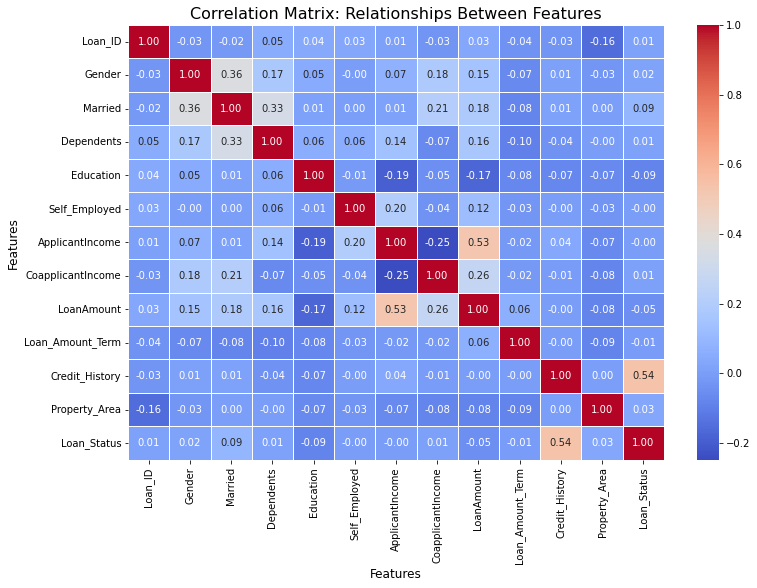

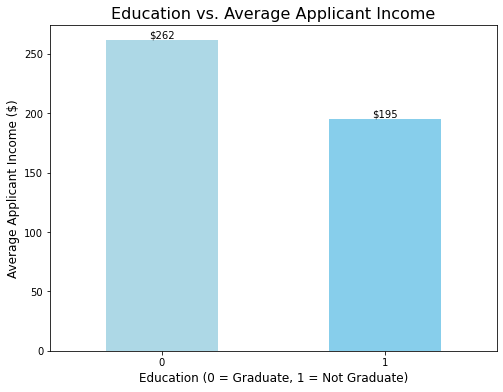

<Figure size 864x576 with 0 Axes>

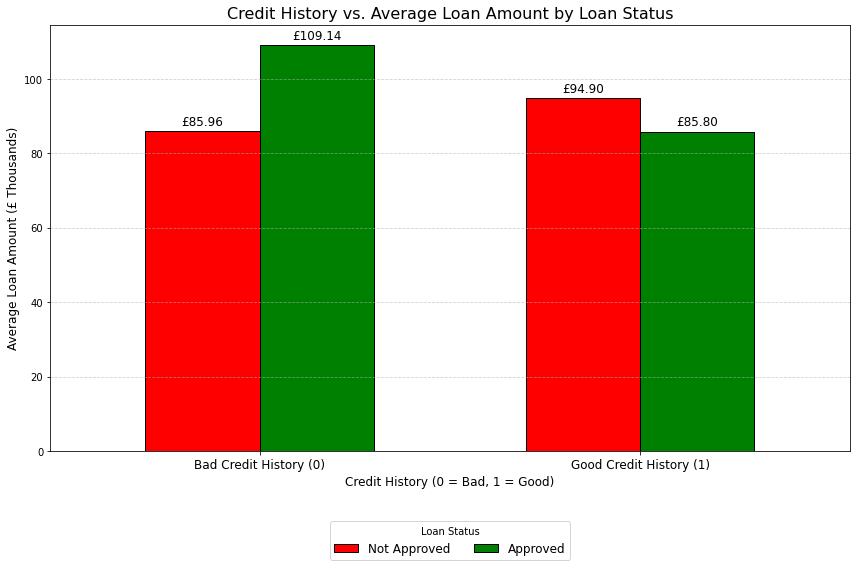

<Figure size 720x432 with 0 Axes>

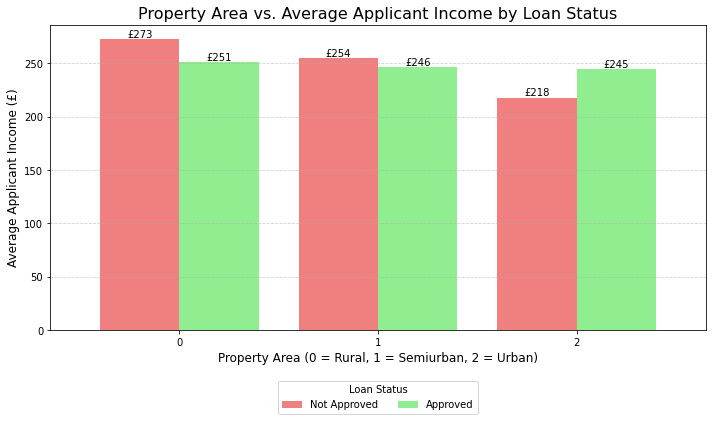

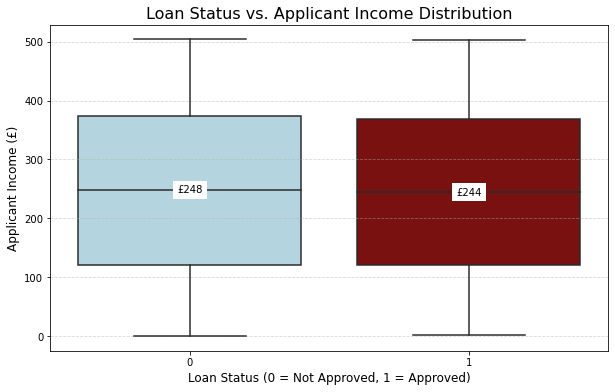

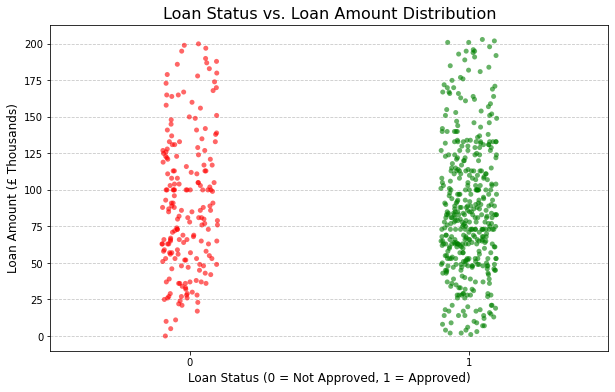

In [2]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Relationships Between Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

# Bar Plot: Education vs. Applicant Income
education_income = data.groupby('Education')['ApplicantIncome'].mean()
plt.figure(figsize=(8, 6))
education_income.plot(kind='bar', color=['lightblue', 'skyblue'])
plt.title("Education vs. Average Applicant Income", fontsize=16)
plt.xlabel("Education (0 = Graduate, 1 = Not Graduate)", fontsize=12)
plt.ylabel("Average Applicant Income ($)", fontsize=12)
plt.xticks(rotation=0)
for index, value in enumerate(education_income):
    plt.text(index, value, f"${value:,.0f}", ha='center', va='bottom', fontsize=10)
plt.show()

# Bar Plot: Credit History vs. Loan Amount by Loan Status
credit_history_loan_amount = data.groupby(['Credit_History', 'Loan_Status'])['LoanAmount'].mean().unstack()
plt.figure(figsize=(12, 8))
bars = credit_history_loan_amount.plot(kind='bar', color=['red', 'green'], width=0.6, edgecolor='black', figsize=(12, 8))
plt.title("Credit History vs. Average Loan Amount by Loan Status", fontsize=16)
plt.xlabel("Credit History (0 = Bad, 1 = Good)", fontsize=12)
plt.ylabel("Average Loan Amount (£ Thousands)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Bad Credit History (0)", "Good Credit History (1)"], fontsize=12, rotation=0)
for container in bars.containers:
    bars.bar_label(container, fmt="£%.2f", fontsize=12, padding=3)
plt.legend(
    ["Not Approved", "Approved"], 
    title="Loan Status", 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15), 
    ncol=2, 
    fontsize=12
)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Bar Plot: Property Area vs. Applicant Income by Loan Status
plt.figure(figsize=(10, 6))
property_income = data.groupby(['Property_Area', 'Loan_Status'])['ApplicantIncome'].mean().unstack()
property_income.plot(kind='bar', color=['lightcoral', 'lightgreen'], figsize=(10, 6), width=0.8)
plt.title("Property Area vs. Average Applicant Income by Loan Status", fontsize=16)
plt.xlabel("Property Area (0 = Rural, 1 = Semiurban, 2 = Urban)", fontsize=12)
plt.ylabel("Average Applicant Income (£)", fontsize=12)
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.bar_label(container, fmt="£%.0f", fontsize=10)
plt.legend(
    ["Not Approved", "Approved"], 
    title="Loan Status", 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15), 
    ncol=2, 
    fontsize=10
)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Box Plot: Applicant Income by Loan Status
colors = ['lightblue', 'darkred']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data, palette=colors)
plt.title("Loan Status vs. Applicant Income Distribution", fontsize=16)
plt.xlabel("Loan Status (0 = Not Approved, 1 = Approved)", fontsize=12)
plt.ylabel("Applicant Income (£)", fontsize=12)
medians = data.groupby('Loan_Status')['ApplicantIncome'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"£{median:,.0f}", ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='none'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Strip Plot: Loan Amount by Loan Status
plt.figure(figsize=(10, 6))
sns.stripplot(
    x='Loan_Status', 
    y='LoanAmount', 
    data=data, 
    jitter=True, 
    palette={0: 'red', 1: 'green'}, 
    alpha=0.6)
plt.title("Loan Status vs. Loan Amount Distribution", fontsize=16)
plt.xlabel("Loan Status (0 = Not Approved, 1 = Approved)", fontsize=12)
plt.ylabel("Loan Amount (£ Thousands)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Model Implementation

## Feature Selection

In [3]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import shap

# Feature selection
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
            'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
X = data[features]
y = data['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

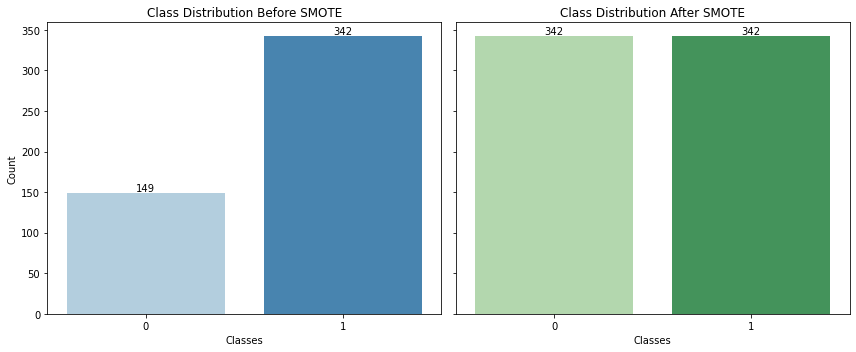

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Class distribution before SMOTE
before_smote = Counter(y_train)

# SMOTE for Class Balancing
smote = SMOTE(random_state=42)

# Class distribution after SMOTE
X_res, y_res = smote.fit_resample(X_train, y_train)
after_smote = Counter(y_res)

# Plot class distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Before SMOTE
sns.barplot(x=list(before_smote.keys()), y=list(before_smote.values()), ax=axes[0], palette="Blues")
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Count")
axes[0].bar_label(axes[0].containers[0])

# After SMOTE
sns.barplot(x=list(after_smote.keys()), y=list(after_smote.values()), ax=axes[1], palette="Greens")
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Classes")
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()


## 2.1 Random Forest Classifier

Random Forest Accuracy: 0.7642276422764228
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



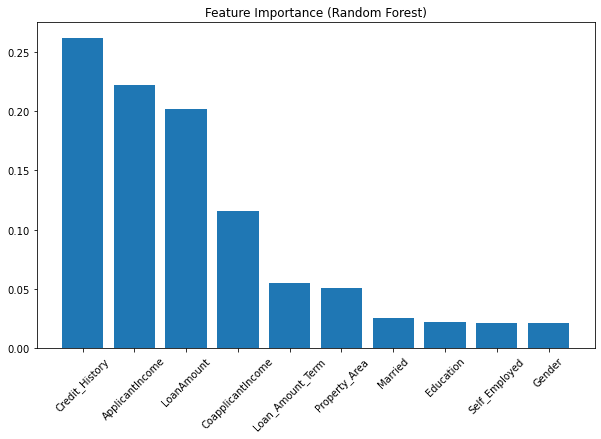

In [5]:
# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature importance
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in sorted_indices], rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [6]:
# Hyperparameter Tuning (Example: Random Forest)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Best Random Forest Accuracy: 0.75


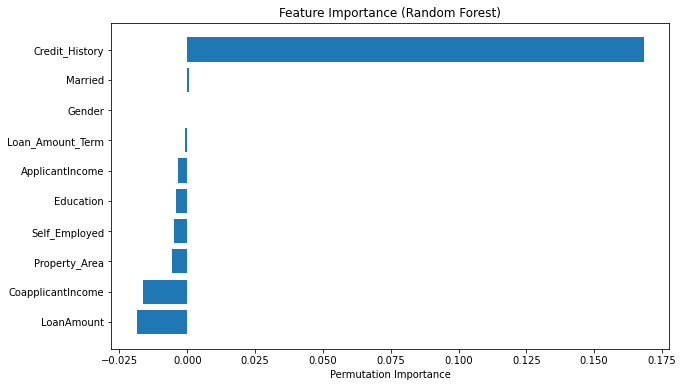

In [7]:
# Feature Importance Analysis
perm_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

## 2.2 Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Logistic Regression Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



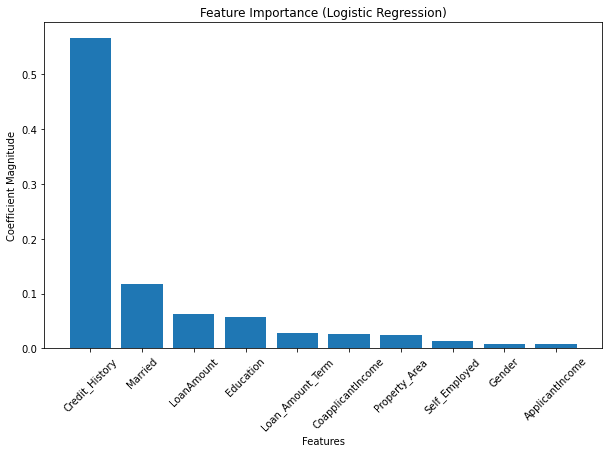

In [9]:
# Logistic Regression Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Solvers compatible with l1/l2
}
grid_search_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best Logistic Regression Model
best_log_reg = grid_search_lr.best_estimator_
y_pred_lr = best_log_reg.predict(X_test)
print("Logistic Regression Best Parameters:", grid_search_lr.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Feature Importance (Logistic Regression)
coefficients = best_log_reg.coef_[0]
sorted_idx = np.argsort(np.abs(coefficients))[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), np.abs(coefficients[sorted_idx]), align='center')
plt.xticks(range(len(coefficients)), [features[i] for i in sorted_idx], rotation=45)
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()


## 2.3 Support Vector Machine (SVM)

In [10]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



SVM Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



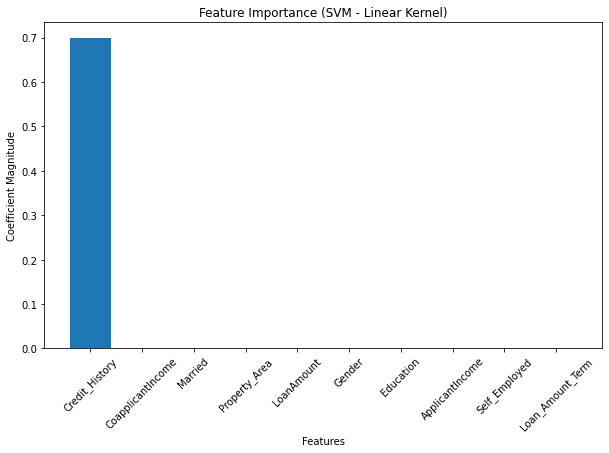

In [11]:
from sklearn.inspection import permutation_importance

# SVM Hyperparameter Tuning
svm_model = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only for 'rbf' and 'poly' kernels
}
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best SVM Model
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print("SVM Best Parameters:", grid_search_svm.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Feature Importance (SVM - Linear Kernel)
if grid_search_svm.best_params_['kernel'] == 'linear':
    coefficients = best_svm.coef_[0]
    sorted_idx = np.argsort(np.abs(coefficients))[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(coefficients)), np.abs(coefficients[sorted_idx]), align='center')
    plt.xticks(range(len(coefficients)), [features[i] for i in sorted_idx], rotation=45)
    plt.title("Feature Importance (SVM - Linear Kernel)")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Magnitude")
    plt.show()
else:
    # Permutation Importance for non-linear kernels
    perm_importance = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
    plt.xlabel("Permutation Importance")
    plt.title("Feature Importance (SVM - Non-linear Kernel)")
    plt.show()


# 3. Summary of Results

## Comparing Model Performance

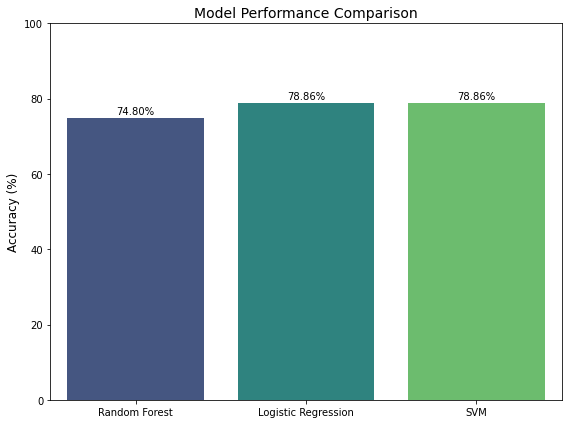

In [13]:
# Model accuracy summary
models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_rf) * 100,
    accuracy_score(y_test, y_pred_lr) * 100,
    accuracy_score(y_test, y_pred_svm) * 100
]

# Bar plot for comparison
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=models, y=accuracies, palette='viridis')
for index, value in enumerate(accuracies):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=10)
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 100)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


# Training Score and Cross Validation Score

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit, learning_curve

# Initialize models
models = {
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate Training Score
    train_predictions = model.predict(X_train)
    training_score = accuracy_score(y_train, train_predictions)
    
    # Calculate Cross-Validation Score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_validation_score = cv_scores.mean()
    
    print(f'{name}:')
    print(f'  Training Score: {training_score:.2f}')
    print(f'  Cross-Validation Score: {cross_validation_score:.2f}\n')


Support Vector Machine:
  Training Score: 0.81
  Cross-Validation Score: 0.81

Random Forest:
  Training Score: 1.00
  Cross-Validation Score: 0.80

Logistic Regression:
  Training Score: 0.81
  Cross-Validation Score: 0.81



# Learning Curve 

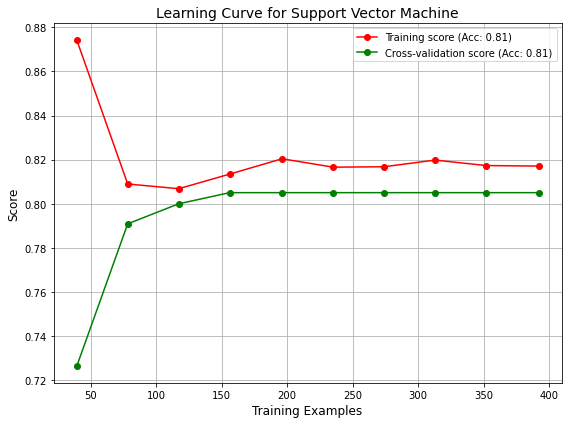

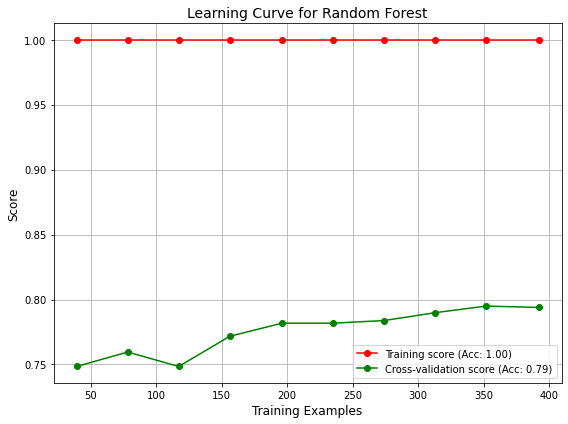

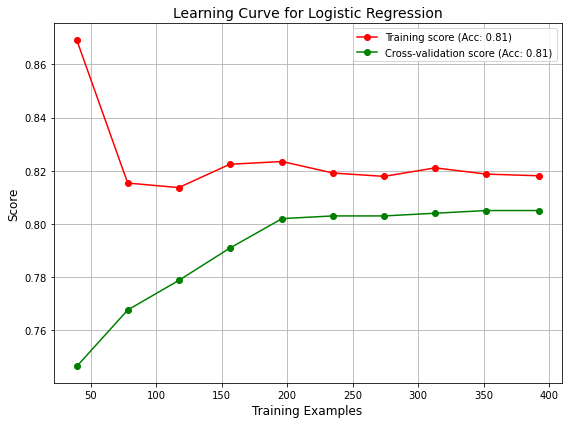

In [16]:
# Import necessary libraries
from sklearn.model_selection import learning_curve, ShuffleSplit, cross_val_score
# Define models
models = {
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Split shuffle strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Plot individual learning curves for each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate Training Score
    train_predictions = model.predict(X_train)
    training_score = accuracy_score(y_train, train_predictions)
    
    # Calculate Cross-Validation Score
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cross_validation_score = cv_scores.mean()
    
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label=f'Training score (Acc: {training_score:.2f})')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label=f'Cross-validation score (Acc: {cross_validation_score:.2f})')
    plt.title(f'Learning Curve for {name}', fontsize=14)
    plt.xlabel('Training Examples', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.tight_layout()
    plt.show()
